<a href="https://colab.research.google.com/github/Robsrepo42/AudioAdScanner/blob/main/2021_02_03_AdScanner_Project_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

## installs - Colab needs every time

In [ ]:
!pip install librosa==0.8.0
!pip install pydub

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preparations

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import specgram
import librosa 
import librosa.display
import os
import glob
from IPython.display import Audio
from scipy.io import wavfile
from scipy import stats
from skimage.feature import peak_local_max
from glob import glob
import os
import sys

In [4]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})

## Backhand extensions

In [ ]:
# import pandas as pd # handling and analysing data (library)
# import seaborn # makes your plots prettier
# seaborn.set(style='ticks')
# import glob # UNIX Style pathname pattern extension
# from IPython.display import Audio # importing Audio Playback Widget
# import os # interaction with Operating system
# import sys # module provides info re constants, functions and methods
# import librosa # library to read and manipulate audio data (librosa.org)
# import librosa.display # display module needs to be imported separately
# from matplotlib.mlab import specgram # for Spectrograms
# from matplotlib.pyplot import specgram # for Spectrograms in librosa 0.6.0
# import pydub # convert .mp3 to .wav Files
# from pydub import AudioSegment
# import simpleaudio as sa # a well documented simple audio package
# import scipy # software ecosystem for mathematics, science, and engineering
# from scipy.io import wavfile
# from scipy import stats
# from skimage.feature import peak_local_max

# Data Load Reduction Routine

## REGION NORD

In [63]:
# Creating list of Foldernames in "nord"
%cd /content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/
for root, ndirnames, filenames in os.walk('.'):
  print (ndirnames)
  break

/content/drive/MyDrive/Notebooks/AdScanner/RAW/nord
['2020-12-07', '2020-12-04', '2020-12-05', '2020-12-08', '2020-12-03', '2020-12-09', '2020-12-06', '2020-12-10', '2020-12-12', '2020-12-11', '2020-12-13', '2020-12-15', '2020-12-14', '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-20', '2020-12-19', '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24', '.ipynb_checkpoints', 'ncombrx', '2020-12-26', '2020-12-25', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2021-01-01', '2020-12-31', '2021-01-02', '2021-01-03', '2021-01-04', '2020-11-30', '2020-12-02', '2020-12-01', '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-21', '2020-11-23', '2020-11-22', '2020-11-18', '2020-11-20', '2020-11-19', '2020-11-15', '2020-11-16', '2020-11-17', '2020-11-12', '2020-11-14', '2020-11-13', '2020-11-09', '2020-11-11', '2020-11-10', '2020-11-07', '2020-11-06', '2020-11-08', '2020-11-05', '2020-11-03', '2020-11-04', '2020-10-30', '2020-11-02', '202

In [ ]:
# For-Loop that copies files to subdirectory if they don't exist, yet
scr = '/content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/'
for x in ndirnames:
  if x == ".ipynb_checkpoints":
    continue
  if x == "ncombrx":
    continue
  path = (scr + x)
  %cd {path}
  %cp -uv *5500.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/ncombrx
  %cp -uv *0000.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/ncombrx
  %cp -uv *2500.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/ncombrx
  %cp -uv *3000.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/ncombrx
  print(path)

In [72]:
# Counting the files in the target directory
source = '/content/drive/MyDrive/Notebooks/AdScanner/RAW/nord/ncombrx'
audio_files = glob(source + '/*.mp3') # defines Audio Files as the MP3s in the source directory
len(audio_files) # how many MP3s are in the source Dir?

8948

## REGION OST

In [66]:
# Creating a list of the Foldernames in "ost"
%cd /content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/
for root, odirnames, filenames in os.walk('.'):
  print (odirnames)
  break

/content/drive/MyDrive/Notebooks/AdScanner/RAW/ost
['2020-12-06', '2020-12-07', '2020-12-04', '2020-12-09', '2020-12-05', '2020-12-08', '2020-12-03', '2020-12-10', '2020-12-13', '2020-12-14', '2020-12-11', '2020-12-12', '2020-12-02', '2020-12-01', '2020-11-30', '2020-11-27', '2020-11-28', '2020-11-29', '2020-11-25', '2020-11-24', '2020-11-26', '2020-11-21', '2020-11-22', '2020-11-23', '2020-12-15', '2020-12-16', '2020-12-17', '2020-11-18', '2020-11-20', '2020-11-19', '2020-11-17', '2020-11-16', '2020-11-15', '2020-11-14', '2020-11-12', '2020-11-13', '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-06', '2020-11-07', '2020-11-08', '2020-12-23', '2020-12-22', '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30', '2020-12-24', '2021-01-01', '2020-12-31', '2021-01-02', '2021-01-03', 'ocombrx', '2021-01-04', '2020-10-29', '2020-10-30', '2020-11-01', '2020-10-31', '2020-11-02', '2021-01-05', '2021-01-06',

In [ ]:
# For-Loop that copies files to subdirectory if they don't exist, yet
scr = '/content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/'
for x in odirnames:
  if x == ".ipynb_checkpoints":
    continue
  if x == "ocombrx":
    continue
  path = (scr + x)
  %cd {path}
  %cp -uv *5500.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/ocombrx
  %cp -uv *0000.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/ocombrx
  %cp -uv *2500.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/ocombrx
  %cp -uv *3000.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/ocombrx
  print(path)

In [68]:
# Counting the files in the target directory
osource = '/content/drive/MyDrive/Notebooks/AdScanner/RAW/ost/ocombrx'
audio_ofiles = glob(osource + '/*.mp3') # defines Audio Files as the MP3s in the source directory
len(audio_ofiles) # how many MP3s are in the source Dir?

8698

## REGION WEST

In [69]:
# Creating a list of the Foldernames in "west"
%cd /content/drive/MyDrive/Notebooks/AdScanner/RAW/west/
for root, wdirnames, filenames in os.walk('.'):
  print (wdirnames)
  break

/content/drive/MyDrive/Notebooks/AdScanner/RAW/west
['2020-12-05', '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-10', '2020-12-02', '2020-11-24', '2020-11-23', '2020-11-25', '2020-11-26', '2020-11-22', '2020-11-20', '2020-11-21', '2020-11-17', '2020-11-15', '2020-11-16', '2020-11-18', '2020-11-19', '2020-11-10', '2020-11-11', '2020-11-27--2020-12-01 - Lücke wg. Linkwechsel', '2020-12-11', '2020-11-13', '2020-11-12', '2020-11-14', '2020-11-08', '2020-11-09', '2020-11-07', '2020-11-05', '2020-11-06', '2020-11-04(_nur 168 von 288)', '2020-11-01', '2020-11-03', '2020-11-02', '2020-10-29', '2020-10-30', '2020-10-31', '2020-12-14', '2020-12-13', '2020-12-12', '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-19', '2020-12-18', '2020-12-20', '2020-12-21', '2020-12-22', '2020-12-25', '2020-12-23', '2020-12-24', '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-30', '2020-12-29', '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03', 'wcombrx',

In [ ]:
# For-Loop that copies files to subdirectory if they don't exist, yet
scr = '/content/drive/MyDrive/Notebooks/AdScanner/RAW/west/'
for x in wdirnames:
  if x == ".ipynb_checkpoints":
    continue
  if x == "wcombrx":
    continue
  path = (scr + x)
  %cd {path}
  %cp -uv *5500.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/west/wcombrx
  %cp -uv *0000.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/west/wcombrx
  %cp -uv *2500.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/west/wcombrx
  %cp -uv *3000.mp3 /content/drive/MyDrive/Notebooks/AdScanner/RAW/west/wcombrx
  print(path)

In [71]:
# Counting the files in the target directory
wsource = '/content/drive/MyDrive/Notebooks/AdScanner/RAW/west/wcombrx'
audio_wfiles = glob(wsource + '/*.mp3') # defines Audio Files as the MP3s in the source directory
len(audio_wfiles) # how many MP3s are in the source Dir?

8485

# Loading Audio to create data arrays from MP3-Files

In [46]:
# Defining the audio sample rate for everything that follows
sr = 44100 # samples the audio 44100 times per second

In [6]:
# MP3 paths
werbe_sep = '/content/drive/MyDrive/Notebooks/AdScanner/Werbetrenner.mp3' # Short audio, signals the beginning of Adbreak
com_break_mp3 = '/content/drive/MyDrive/Notebooks/AdScanner/1_Break_Spots/20201030-075500.mp3' # 5 Minute Recording containing one whole Adbreak
ALDI_mp3 = '/content/drive/MyDrive/Notebooks/AdScanner/1_Break_Spots/ALDI_20s.mp3' # One Commercial contained in the Adbreak above
news_opn = '/content/drive/MyDrive/Notebooks/AdScanner/1_Break_Spots/Newsopener_2s.mp3' # The "News-Opener" signals the End of the Adbreak
McDonalds_mp3 = '/content/drive/MyDrive/Notebooks/AdScanner/1_Break_Spots/McDonalds_10s.mp3' # Another commercial contained in Adbreak

In [ ]:
# Creating numpy arrays from all four MP3-Files with Librosa, Sample Rate: 44100 per Second in Mono (1 Channel)
ALDI_array, rate = librosa.load(ALDI_mp3, sr=sr, mono=True) # creates a numpy array
com_break_array, rate = librosa.load(com_break_mp3, sr=sr, mono=True)
werbe_sep_array, rate = librosa.load(werbe_sep, sr=sr, mono=True)
news_opn_array, rate = librosa.load(news_opn, sr=sr, mono=True)
McDonalds_array, rate = librosa.load(McDonalds_mp3, sr=sr, mono=True)

# Selecting an Audio data array for further analysis

In [47]:
# Selecting an Audio from above and defining the sample rate (sr) as the one used in reading the audio
audio = ALDI_array # Pick one from above
sr = rate

In [48]:
# Some Information about the selected Audio
print(audio.shape, sr) # number of observations and sample rate per sec
print(sr) # the sample rate
print('duration (Sec.): ', len(audio)/sr) # length of audio

(882505,) 44100
44100
duration (Sec.):  20.01145124716553


# Checking Data Audiovisually

In [ ]:
# Plotting the ALDI Wave
librosa.display.waveplot(audio, sr);

In [ ]:
# Play the Audio from Data (IPython Audio Widget):
Audio(data=audio, rate=sr)

# Defining Functions 

"identify_peaks"
"define_target_zone"
"extract_coord_pairs"
"condense_coords"

In [29]:
def highpass_filter(im):
    kernel = np.array([[-1, -1, -1, -1, -1],
                       [-1,  1,  2,  1, -1],
                       [-1,  2,  4,  2, -1],
                       [-1,  1,  2,  1, -1],
                       [-1, -1, -1, -1, -1]])
    
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])
    
    return ndimage.convolve(im, kernel, mode='reflect')

In [30]:
def maxfil_local_max(im, *args, **kwargs):
    
    if 'threshold' in kwargs.keys():
        # Remove the entry fro key 'threshold' from the `kwargs` dict and store its value.
        threshold = kwargs.pop('threshold')
        
    # Use ndimage to find the coordinates of maximum peaks
    image_max = ndimage.maximum_filter(im, *args, **kwargs) == im

    y, x = np.where(image_max & (im > threshold))
    # Stack `x` and `y` together by placing the `y` column next to the `x` column.
    return np.stack((y, x), axis=1)

In [31]:
def identify_peaks(im, *args, **kwargs): 
    # Encapsulate this functionality for possible replacements of the function that generates `coordinates`.
    coordinates = peak_local_max(im, *args, **kwargs) # Scipy peak_local_max aus imagedata + Sternchenoperatoren
    
    time_coordinates = coordinates[:, 1]
    freq_coordinates = coordinates[:, 0]
    
    time_sort_ind = np.argsort(time_coordinates)
    
    return (freq_coordinates[time_sort_ind],
            time_coordinates[time_sort_ind])

In [32]:
# This function returns a booleans mask, which defines the target zone.
def define_target_zone(dt):
    tz_start = 0
    
    tz_end_type = 'count'
    tz_end = 300
    
    tz_upper = np.inf
    tz_lower = -np.inf
    
    max_tz_length = 10
    
    # 1. Define the starting point of the target zone (and also include all consecutive points).
    target_zone = (dt > tz_start)
    
    # 2. Define the ending point of the target zone.
    # If `tz_end_type` equals 'count', the number of points in the zone is considered rather than the time.
    if tz_end_type == 'count':
        # Sum per column and take only those points where the sum is within the limit of `tz_end`.
        target_zone = target_zone & (np.cumsum(target_zone, axis = 0) <= tz_end)
        
        # Nonetheless apply a upper contraint for the time to keep the target zone resonably sized.
        target_zone = target_zone & (dt <= tz_start + max_tz_length)
    else:
        target_zone = target_zone & (dt <= tz_end)
        
    # 3. Apply lower and upper bounds for the frequency range of the target zone.
    #TODO:
    
    return target_zone

In [33]:
def condense_coords(coord_pairs):
    # Create a one-dimensionsal column vector 
    coord_pairs_rs = np.reshape(coord_pairs, (-1, 4), order='F')

    nans_per_row = np.isnan(coord_pairs_rs).sum(axis=1)
    # Remove all rows that contain at least one NaN (i.e. only keep those where `nans_per row` equals 0)
    coord_pairs_rs = coord_pairs_rs[nans_per_row == 0, :]
    
    return coord_pairs_rs

In [34]:
def extract_coord_pairs(im, freqs, t, *args, **kwargs):
    freq_coords, time_coords = identify_peaks(im, *args, **kwargs)
    
    # Explicitly reshape `freqs` and `t` to make them column vectors.
    freq_inds = np.reshape(freq_coords, (-1, 1))
    t_inds = np.reshape(time_coords, (-1, 1))
    
    # Calculate `dt` 
    # The first row of `dt` has elements t[0] - t[0], t[0] - t[1], t[0] - t[2], ...
    # The first column of `dt` stores all (positve, i.e. forward looking) Δt with reference to t[0].
    dt = t_inds - t_inds.T
    
    # Note that here the actaul time values are used and not the indices.
    target_zone = define_target_zone(np.reshape(t[time_coords], (-1, 1)) - np.reshape(t[time_coords], (-1, 1)).T)
    #target_zone = define_target_zone(dt)
    
    # Convert `target_zone` to int to be able to use NaNs.
    target_zone = target_zone.astype(float)
    # Set all values in the target zone mask to NaN that are not within the respective target zone.
    target_zone[target_zone == 0] = np.nan
    
    # Transpose `f_anchor` and `t_anchor` such that they become row vectors and each column (which only has one element) is related to the columns of `dt`.
    f_anchor = freq_inds.T * target_zone
    t_anchor = t_inds.T * target_zone
    f_2 = freq_inds * target_zone
    dt = dt * target_zone
    
    # Each coordinate is a 2-D Matrix.
    stacked_coords = np.stack((f_anchor, f_2, dt, t_anchor), axis=2)
    
    # Reshape and remove NaNs before returning.
    return condense_coords(stacked_coords)

In [35]:
# Defining a Function that Plots Peak-Frequencies Points => a "Constellation Map"
def show_peaks(Z, freqs, t, coord, title):
    fig = plt.figure(figsize=(10, 8), facecolor='white')
    im = plt.imshow(Z, cmap='viridis')
    plt.scatter(coord[:, 1], coord[:, 0], s=1, color='r')
    ax = plt.gca()
    plt.colorbar(im)
    plt.xlabel('Time bin')
    plt.ylabel('Frequency')
    plt.title(title, fontsize=18)
    plt.axis('auto')
    ax.set_xlim([0, len(t)])
    ax.set_ylim([len(freqs), 0])
    #ax.xaxis.set_ticklabels([])
    #ax.yaxis.set_ticklabels([])
    plt.show()

# Creating Spectrograms from Audio (FFT - Fast Fourier Transform)
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.specgram.html

In [16]:
# # local path Jupyter NB
# path = 'C:\\Users\\pizza\\Google Drive\\1_Break_Spots\\'
# # Google Drive path (colab)
path = '/content/drive/MyDrive/Notebooks/AdScanner/1_Break_Spots/'

In [ ]:
# Reloading files to fit variable names that work also for comparisons
full_block, rate = librosa.load(path + '20201030-075500.mp3', sr = 44100, mono=True) # a five minute audio containing one full commercial break
ALDI, _ = librosa.load(path + 'ALDI_20s.mp3', sr = 44100, mono=True) # one commercial by ALDI, which is contained in/part of / subset of "full_block"

In [18]:
# Creating spectrograms of both audio files, with dimensions of frequency-by-time.
full_spec, freq, full_t = specgram(full_block, NFFT=256, Fs=rate, noverlap=128)
ALDI_spec, freq, ALDI_t = specgram(ALDI, NFFT=256, Fs=rate, noverlap=128)

# Set zero values to small values so `np.log10` works.
full_spec[full_spec == 0] = 1e-6
ALDI_spec[ALDI_spec == 0] = 1e-6

In [19]:
full_spec_dB = 10.0 * np.log10(full_spec)
ALDI_spec_dB = 10.0 * np.log10(ALDI_spec)

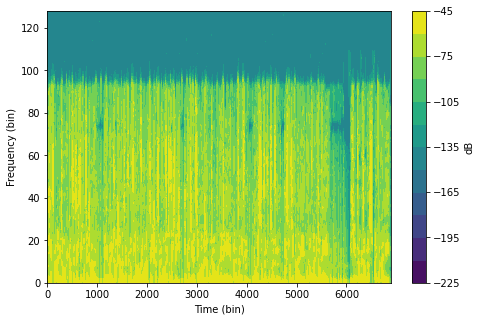

In [20]:
# Spectrogram of ALDI spot
plt.figure(figsize=(7.7,5), facecolor='white')
plt.contourf(ALDI_spec_dB, levels=np.arange(-225, -30, 15)) 
cb = plt.colorbar()
cb.set_label('dB')
plt.ylabel('Frequency (bin)')
plt.xlabel('Time (bin)')
plt.show()

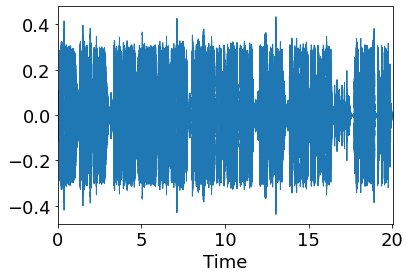

In [72]:
# Wave plot of ALDI Spot
sr=44100
librosa.display.waveplot(ALDI, sr)
fig = plt.gcf()
fig.set_facecolor('white')

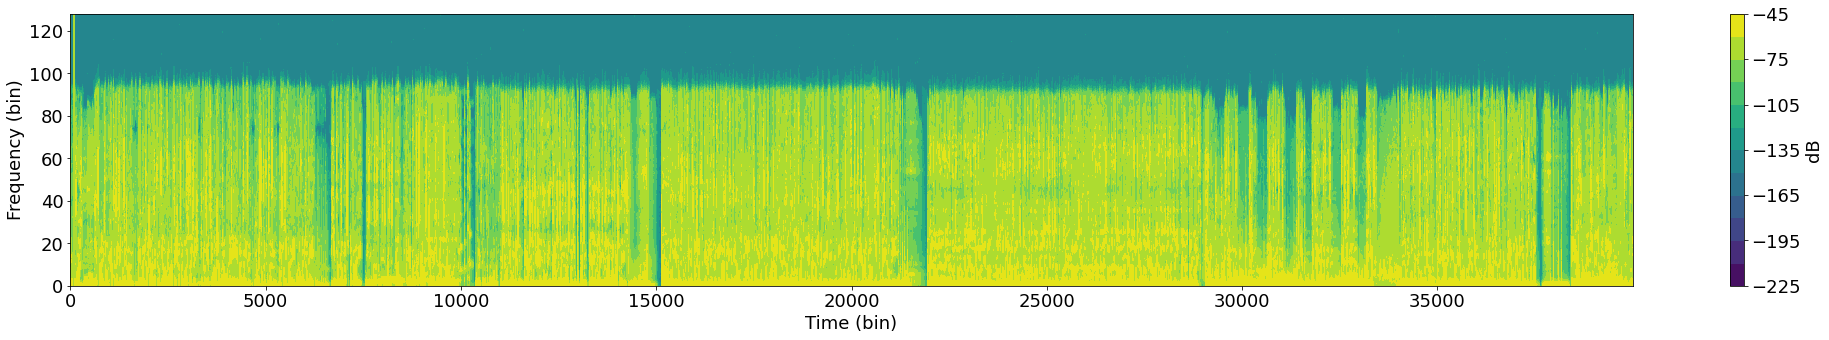

In [70]:
# Plotting the full sized audio Spectrogramm (5 Minutes)
#plt.figure(figsize=(10,5))
plt.figure(figsize=(35,5), facecolor='white') # very looong plot, allows for visual identification of above ALDI Spot
plt.contourf(full_spec_dB[:, :40000], levels=np.arange(-225, -30, 15)) # plotting the first 40k of 103k values
cb = plt.colorbar()
cb.set_label('dB')
plt.ylabel('Frequency (bin)')
plt.xlabel('Time (bin)')
plt.show()

# Using Function show_peaks to visualise Peak Amplitudes in seleted Audio (Constellation Map)

In [ ]:
plt.figure(figsize = (8,7), facecolor='w')
con = plt.contourf(ALDI_spec_dB, levels=np.arange(-225, -30, 15))
freq_ind, time_ind = identify_peaks(ALDI_spec_dB, min_distance=20, threshold_abs=-60)
plt.scatter(time_ind, freq_ind, s=7, color='r')
plt.xlabel('Time (bins)')
plt.ylabel('Frequency (bins)')
plt.title('Spectrogram ALDI spot with {0:d} Peaks'.format(len(time_ind)))
cb = plt.colorbar(mappable=con)
cb.set_label('dB')

In [ ]:
plt.figure(figsize = (46,7), facecolor='white')
con = plt.contourf(full_spec_dB[:, :40000], levels=np.arange(-225, -30, 15))
freq_ind, time_ind = identify_peaks(full_spec_dB[:, :40000], min_distance=20, threshold_abs=-60)
plt.scatter(time_ind, freq_ind, s=7, color='r')
plt.xlabel('Time (bins)')
plt.ylabel('Frequency (bins)')
plt.title('Spectrogram Full Block with {0:d} Peaks'.format(len(time_ind)))
cb = plt.colorbar(mappable=con)
cb.set_label('dB')

# Define Hash Functions

In [53]:
# This function only works with scalar values.
# TODO: Change this!!
# def hash_by_sobot(freq_1, freq_2, dt):
#     try:
#         freq_1 = int(freq_1)
#         freq_2 = int(freq_2)
#         dt = int(dt)
#     except ValueError:
#         return np.nan
    
#     return (dt & 0x0000FFFF) | ((freq_2 & 0xFF) << 16) | ((freq_1 & 0xFF) << 24)

In [54]:
def hash_by_sobot(coordinates):
    # For the operations to follow the dtype needs to be integer.
    # Note that this also pecifies the dtape of the final hash value.
    coordinates = coordinates.astype('int32')
    
    f_anchor = coordinates[:, 0]
    f_2 = coordinates[:, 1]
    dt = coordinates[:, 2]
    
    t_anchor = coordinates[:, 3]
    
    hash_value = (dt & 0x0000FFFF) | ((f_2 & 0x000000FF) << 16) | ((f_anchor & 0x000000FF) << 24)
    #print(bin(hash_value[0]))
    return (hash_value, t_anchor)

In [55]:
def hash_by_late(coordinates):
    # For the operations to follow the dtype needs to be integer.
    # Note that this also pecifies the dtape of the final hash value.
    coordinates = coordinates.astype('int32')
    
    f_anchor = coordinates[:, 0]
    f_2 = coordinates[:, 1]
    dt = coordinates[:, 2]
    
    t_anchor = coordinates[:, 3]
    
                  # 1-8 Bit for dt   # 9-20 Bit for f_2          # 21-32 Bit for f_anchor 
    hash_value = (dt & 0x000000FF) | ((f_2 & 0x00000FFF) << 8) | ((f_anchor & 0x00000FFF) << 20)
    return (hash_value, t_anchor)

In [56]:
def hash_by_int64(coordinates):
    # For the operations to follow the dtype needs to be integer.
    # Note that this also pecifies the dtape of the final hash value.
    coordinates = coordinates.astype('int64')
    
    f_anchor = coordinates[:, 0]
    f_2 = coordinates[:, 1]
    dt = coordinates[:, 2]
    
    t_anchor = coordinates[:, 3]
                 # 32 Bit for dt (1-32); 16 Bit for Frequencies (33-48 for f_2 and 49-68 for f_anchor).
    hash_value = (dt & 0xFFFFFFFF) | ((f_2 & 0x0000FFFF) << 32) | ((f_anchor & 0x0000FFFF) << 48)
    return (hash_value, t_anchor)

In [57]:
# Returns a tuple of arrays.
def spec2hash(im, freqs, t, *args, **kwargs):
    
    # Extract the condensed coordinate pairs 
    coord_pairs = extract_coord_pairs(im, freqs, t, *args, **kwargs)
    
    
    # Apply the hash function
    return hash_by_sobot(coord_pairs)
    #return hash_by_late(coord_pairs)
    #return hash_by_int64(coord_pairs)

In [58]:
# Returns a list of tuples.
def windowed_hash(im, freqs, t, window_length=None, window_overlap=None, drawplot=False, *args, **kwargs):
       
    if window_length is None:
        window_length = len(t) / 10
        
    if type(window_length) is not int:
        window_length = int(window_length)
        
    if window_overlap is None:
        window_overlap = window_length / 2
        
    if type(window_overlap) is not int:
        window_overlap = int(window_overlap)
    
    # The last window should be at least 'window_overlap' from the end point.
    start_inds = np.arange(0, len(t) - window_overlap, window_overlap)
    
    hash_vals = [np.nan] * len(start_inds)
    
    for i, start_ind in enumerate(start_inds):
        # Note that x[i:j] does not include the j-th element. 
        end_ind = min(len(t), start_ind + window_length)
        
        hash_vals[i] = spec2hash(im[:, start_ind:end_ind], freqs, t[start_ind:end_ind], *args, **kwargs)
        if i < 7 and drawplot: 
          plot_im = np.copy(im)
          plot_im[:, :start_ind] = np.nan
          plot_im[:, end_ind + 1:] = np.nan
          plt.figure(figsize=(40,5))
          freq_ind, time_ind = identify_peaks(plot_im, *args, **kwargs)
          pcon = plt.contourf(plot_im)
          plt.scatter(time_ind, freq_ind, s=2, color='r')
          plt.colorbar(mappable=pcon)
          plt.title('Window {0:d} with {1:d} peaks'.format(i, len(freq_ind)))
          plt.show()
        
    return hash_vals

In [59]:
def check_matches(ground_truth, stream_spec, stream_freq, stream_t, window_length=None, window_overlap=None, drawplot=False, *args, **kwargs):
    windowed_hash_vals = windowed_hash(stream_spec, stream_freq, stream_t, window_length, window_overlap, drawplot, *args, **kwargs)
    
    score = np.empty(len(windowed_hash_vals))
    # Get a boolean array, where the hashes of the window equal one of the hashes in ground truth
    for i, window in enumerate(windowed_hash_vals):
        
        if len(window[0]) > 0:
            #print(window[0])
            #print(np.in1d(window[0], ground_truth[0]).sum())
            #print([bin(hash) for hash in window[0][np.in1d(window[0], ground_truth[0])]])
            score[i] = (np.in1d(window[0], ground_truth[0]).sum())/len(window[0])
        else:
            score[i] = 0
    return score    

# Evaluation of "Known Commercial" vs. "unknown Audio"

In [60]:
ALDI_hash = spec2hash(ALDI_spec_dB, freq, ALDI_t, min_distance=20, threshold_abs=-60)

In [ ]:
plt.plot(check_matches(ALDI_hash, full_spec_dB, freq, full_t, window_length=1840, drawplot=True, min_distance=20, threshold_abs=-60))
plt.title('ALDI Hashed by Sobot % Matches in Time Bins')
plt.show()

# Let's do this again... for McDonalds

In [38]:
# Loading McDonalds Commercial
McDonalds, _ = librosa.load(path + 'McDonalds_10s.mp3', sr = 44100, mono=True)

/usr/local/lib/python3.6/dist-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [39]:
# Creating Spectrogram for McDonalds
McDonalds_spec, freq, McDonalds_t = specgram(McDonalds, NFFT=256, Fs=rate, noverlap=128)
McDonalds_spec[McDonalds_spec == 0] = 1e-6
McDonalds_spec_dB = 10.0 * np.log10(McDonalds_spec)

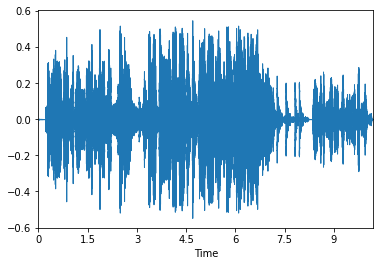

In [43]:
# Wave plot McDonalds Spot
sr=44100
librosa.display.waveplot(McDonalds, sr)
fig = plt.gcf()
fig.set_facecolor('w')

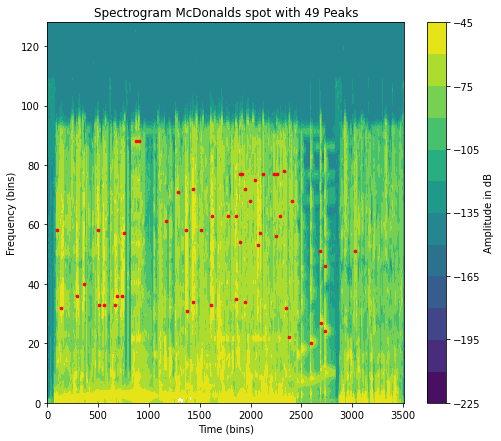

In [42]:
# Visualizing a Spectrogram incl. Peaks
plt.figure(figsize = (8,7), facecolor='w')
con = plt.contourf(McDonalds_spec_dB, levels=np.arange(-225, -30, 15))

freq_ind, time_ind = identify_peaks(McDonalds_spec_dB, min_distance=20, threshold_abs=-60)
plt.scatter(time_ind, freq_ind, s=7, color='r')

plt.xlabel('Time (bins)')
plt.ylabel('Frequency (bins)')
plt.title('Spectrogram McDonalds spot with {0:d} Peaks'.format(len(time_ind)))
cb = plt.colorbar(mappable=con)
cb.set_label('Amplitude in dB')

In [44]:
# Hashing Coord-Pairs
McDonalds_hash = spec2hash(McDonalds_spec_dB, freq, McDonalds_t, min_distance=20, threshold_abs=-60)

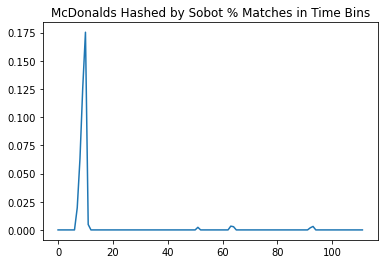

In [62]:
# Checking for Hash Value Matches in Time bins
plt.plot(check_matches(McDonalds_hash, full_spec_dB, freq, full_t, window_length=1840, drawplot=False, min_distance=20, threshold_abs=-60))
plt.title('McDonalds Hashed by Sobot % Matches in Time Bins')
plt.show()